In [1]:
import pandas as pd             #read and deal with dataframe
import numpy as np              #deal with math function
import matplotlib.pyplot as plt #graph linear regression
import seaborn as sns           #advanced graph
from sklearn import metrics     #scikit-learn to build model and cal MSE


In [2]:
BostonData = pd.read_csv('/content/BostonHousing.csv')  #read csv file
BostonData                                              #print csv file

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
BostonData.head()  #print head of data


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
BostonData.columns  #print name of columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
BostonData.info()       #print date information to knew type of date
BostonData.describe()   #print date describtion to knew some statistics like mean , max , min , stc , and so on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relation between room and price')

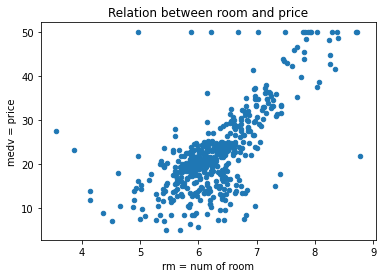

In [6]:
BostonData.plot.scatter('rm', 'medv') #graph show relation between num of room and price
plt.xlabel('rm = num of room')
plt.ylabel('medv = price')
plt.title('Relation between room and price')

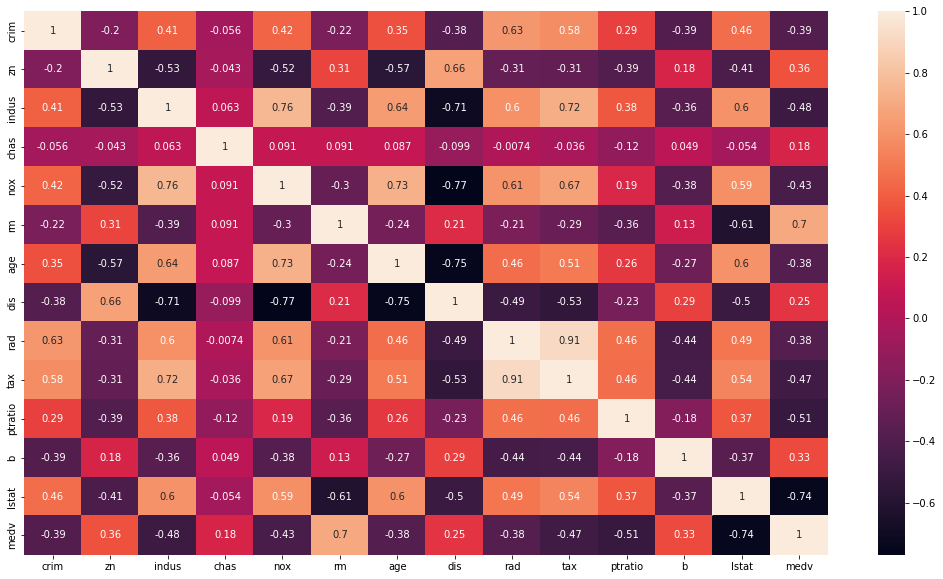

In [7]:
#from this correlation we knew the effect feature with my label 
fig,ax = plt.subplots(figsize=(18,10))  
sns.heatmap(BostonData.corr(),annot=True)  #plot hotmap to show correlation between features and label(price) 

In [8]:
X = BostonData[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
Y = BostonData['medv']
X.head()
# Y.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.4) #split data into training and testing 

In [11]:
X_train.shape , X_test.shape #print amount of  training and testing data


((303, 13), (203, 13))

In [12]:
lm = LinearRegression()   #build LR model 
lm.fit(X_train,Y_train)   #train model 

LinearRegression()

In [13]:
y_predict = lm.predict(X_test) #test model 

In [18]:

df = pd.DataFrame(data=[y_predict,y_test]) #print value of price test and predict to comapre result
df.T


,0,1
0,27.483408,23.2
1,37.867589,32.4
2,13.585587,13.5
3,24.870791,21.6
4,20.928133,18.3
...,...,...
198,36.341544,35.2
199,32.502400,30.8
200,31.175061,32.9
201,5.312403,8.4


Text(0.5, 1.0, 'relation between testing and prediction model')

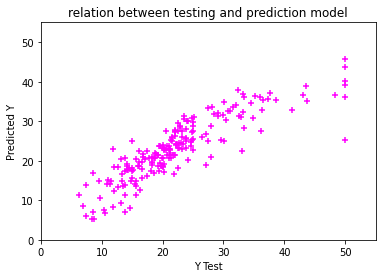

In [15]:
plt.scatter(y_test,y_predict, marker='+', color='magenta') # graph to show y_test and y_predict
plt.axis([0, 55, 0, 55])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('relation between testing and prediction model')
# plt.figure(figsize=(100, 50))



In [16]:
MSE = metrics.mean_squared_error(y_test, y_predict) #cal MSE = 1/n Sum (y_test - y_predict)^2
print('Mean Squared Error:', MSE)  #


Mean Squared Error: 20.533285660177427
